<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/diabet_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.corrwith(df['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [10]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
x = [1]
f = df['Outcome'].isin(x)
dc = df[f]
y = [0]
c = df['Outcome'].isin(y)
dg = df[c]
dg.index = list(range(0,len(dg)))
dg = dg.iloc[list(range(0,290))]
df_new = df.drop(['SkinThickness','BloodPressure','Insulin','DiabetesPedigreeFunction'],axis=1)

In [160]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df_new,test_size=0.2, random_state=25)
X_train = train_set.drop('Outcome',axis=1)
y = train_set['Outcome']
X_train.head()

,Pregnancies,Glucose,BMI,Age
118,4,97,28.2,22
336,0,117,33.8,44
374,2,122,36.2,28
518,13,76,32.8,41
716,3,173,33.8,31


In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
full_pipeline = Pipeline([
                          ('standardization',StandardScaler())
])
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared[:5]

array([[ 0.046374  , -0.75203086, -0.48207705, -0.98537579],
       [-1.12779645, -0.13290114,  0.22625752,  0.8954291 ],
       [-0.54071123,  0.02188129,  0.52982948, -0.472429  ],
       [ 2.6882575 , -1.40211708,  0.09976921,  0.6389557 ],
       [-0.24716862,  1.6006621 ,  0.22625752, -0.21595561]])

In [124]:
from sklearn.linear_model import LogisticRegression
LG_model = LogisticRegression()
LG_model.fit(X_train_prepared,y)

LogisticRegression()

In [125]:
from sklearn.metrics import accuracy_score
X_train_prediction = LG_model.predict(X_train_prepared)
accuracy_on_training_data = accuracy_score(y,X_train_prediction)
accuracy_on_training_data

0.762214983713355

In [126]:
X_test = test_set.drop('Outcome',axis=1)
y_test = test_set['Outcome']

In [127]:
X_test_prepared = full_pipeline.fit_transform(X_test)
X_test_prediction = LG_model.predict(X_test_prepared)
accuracy_on_testing_data = accuracy_score(y_test,X_test_prediction)
accuracy_on_testing_data

0.7467532467532467

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_prepared,y)

KNeighborsClassifier(n_neighbors=11)

In [148]:
X_prediction_training = knn.predict(X_train_prepared)
accuracy_on_training_data_knn = accuracy_score(y,X_prediction_training)
accuracy_on_training_data_knn

0.8045602605863192

In [149]:
X_prediction_testing = knn.predict(X_test_prepared)
accuracy_on_testing_data_knn = accuracy_score(y_test,X_prediction_testing)
accuracy_on_testing_data_knn

0.7467532467532467

In [150]:
from sklearn.metrics import jaccard_score
accuracy_train = jaccard_score(y,X_train_prediction)
accuracy_train

0.45724907063197023

In [151]:
accuracy_test = jaccard_score(y_test,X_test_prediction)
accuracy_test

0.417910447761194

In [152]:
accuracy_train_knn = jaccard_score(y,X_prediction_training)
accuracy_train_knn

0.5620437956204379

In [153]:
accuracy_test_knn = jaccard_score(y_test,X_prediction_testing)
accuracy_test_knn

0.4090909090909091

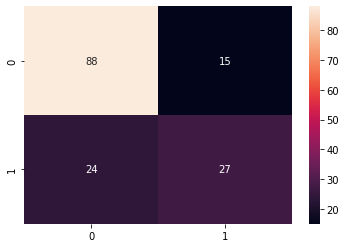

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, X_prediction_testing), annot=True)
plt.show()

In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_prediction_testing))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       103
           1       0.64      0.53      0.58        51

    accuracy                           0.75       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [156]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X_train_prepared, y = y, cv = 5)
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       397
           1       0.69      0.60      0.64       217

    accuracy                           0.76       614
   macro avg       0.74      0.73      0.73       614
weighted avg       0.76      0.76      0.76       614



In [157]:
predict = cross_val_predict(estimator = LG_model, X = X_train_prepared, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       397
           1       0.69      0.54      0.61       217

    accuracy                           0.75       614
   macro avg       0.73      0.71      0.71       614
weighted avg       0.75      0.75      0.74       614



In [144]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X_train_prepared, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [158]:
knn_gscv.best_params_

{'n_neighbors': 11}

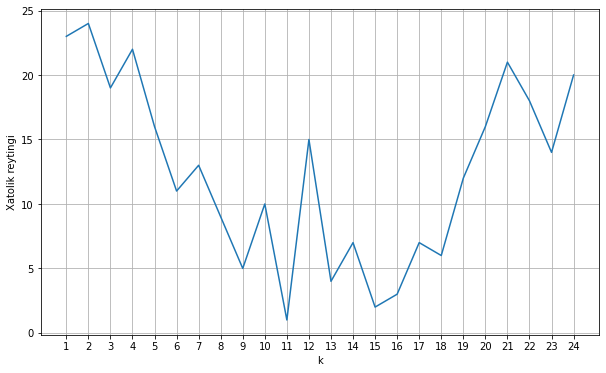

In [159]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [163]:
new_comer = [[1,80,31.5,19]]
new = full_pipeline.fit_transform(new_comer)

In [165]:
pred = knn.predict(new)

In [166]:
pred

array([0])